Multivariate SARIMAX Forecasting Nuitees dans l'hôtellerie Pays de la Loire PDL 2016 
Datasets https://github.com/jinnyto/touristcast/tree/datasets/datasets

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pyramid
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
dn = pd.read_csv('./datasets/nights_2010-2017.csv',parse_dates=['date'], index_col='date',usecols=[*range(1, 15)])
dm = pd.read_csv('./datasets/avgtemp_2010-2017.csv',parse_dates=['date'],index_col='date',usecols=[*range(1, 15)])
dh = pd.read_csv('./datasets/daysoff_2010-2017.csv',parse_dates=['date'],index_col='date',usecols=['date','daysoff'])
dg = pd.read_csv('./datasets/regionalGDP_2010-2015.csv',parse_dates=['date'],index_col='date',usecols=[*range(1, 15)])
dr = pd.concat([dn, dm,dh,dg], axis=1)
df = dr.dropna()
df = df[['nights_PDL','avgtemp_PDL','gdp_PDL','daysoff']]
exogenous = df[['avgtemp_PDL','gdp_PDL','daysoff']]
y = np.array(df.nights_PDL)

<Figure size 432x288 with 0 Axes>

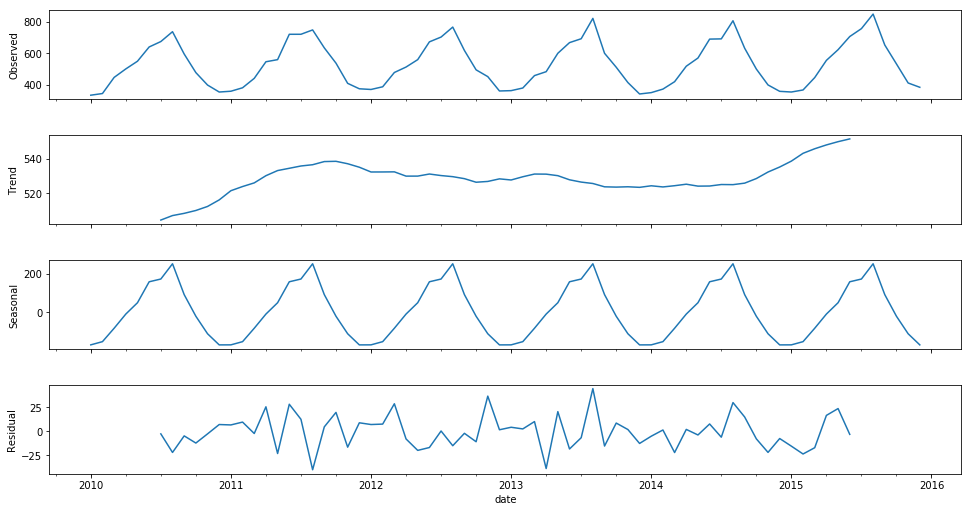

In [152]:
decomposition = seasonal_decompose(df.nights_PDL, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

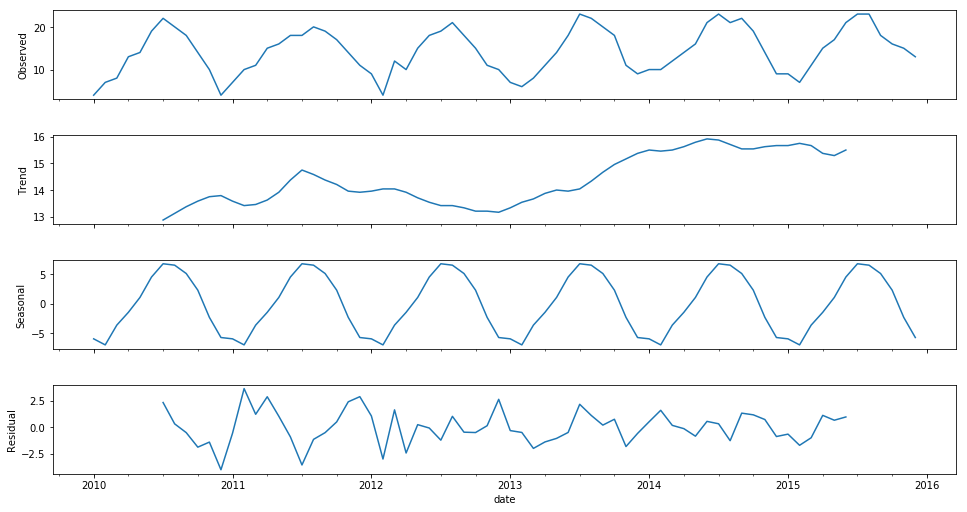

In [5]:
decomposition = seasonal_decompose(df.avgtemp_PDL, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

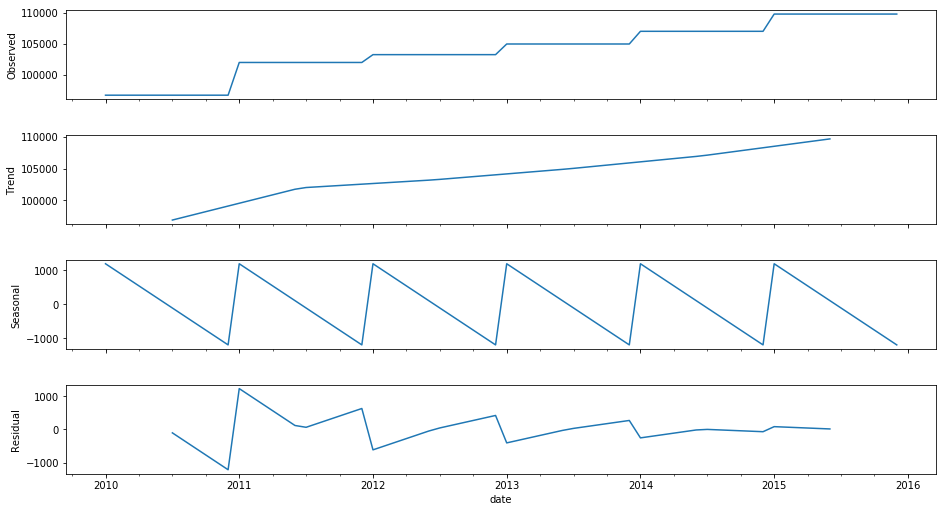

In [6]:
decomposition = seasonal_decompose(df.gdp_PDL, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

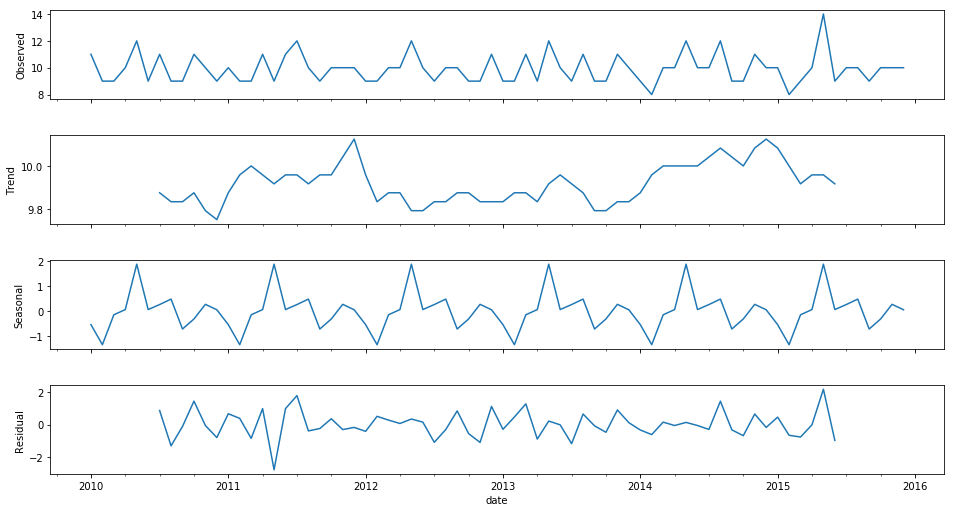

In [7]:
decomposition = seasonal_decompose(df.daysoff, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [10]:
from pyramid.arima import auto_arima
tc_fit = auto_arima (y=y,exogenous=exogenous, start_p=0, start_q=0, max_p=5, max_q=5, m=12,
                    start_P=1, seasonal=True, n_jobs=-1, d=1, D=1, trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=False, random=True, random_state=42,  # we can fit a random search (not exhaustive)
                    n_fits=25)

tc_fit.summary()

Fit ARIMA: order=(3, 1, 4) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 5) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(5, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 5) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=554.987, BIC=571.608, Fit time=6.117 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=567.867, BIC=590.720, Fit time=8.322 seconds
Fit ARIMA: order=(3, 1, 5) seasonal_order=(1, 1, 1, 12); AIC=566.805, BIC=597.968, Fit time=17.936 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=571.899, BIC=590.597, Fit time=44.446 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(2, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan second

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -269.494
Date:                            Mon, 20 Aug 2018   AIC                            554.987
Time:                                    11:46:13   BIC                            571.608
Sample:                                         0   HQIC                           561.475
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3253      0.233      1.394      0.163      -0.132       0.783
x1            -1.1813      1.849     -0.639      0.523      -4.805       2.442
x2             0.0125      0.003      4.304      0.000       0.007       0.018
x3             6.7806      3.213      2.111      0.035       0.484      13.077
ma.L1         -0.9963      1.509     -0.660      0.509      -3.955       1.962
ar.S.L12      -0.0371      0.351     -0.106      0.916      -0.725       0.650
ma.S.L12      -0.4605      0.428     -1.075      0.282      -1.300       0.379
sigma2       499.7588    708.198      0.706      0.480    -888.283    1887.800
===================================================================================
Ljung-Box (Q):                       29.11   Jarque-Bera (JB):                 2.34
Prob(Q):                              0.90   Prob(JB):                         0.31
Heteroskedasticity (H):               1.07   Skew:                             0.42
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [160]:
dftrain = dr[(dr.index>='2010-01-01')&(dr.index<'2016-01-01')]
train_nights  = np.array(dftrain.nights_PDL)
train_exogenous =  np.array(dftrain[['avgtemp_PDL','daysoff']])
dftest = dr[(dr.index>='2016-01-01')&(dr.index<'2017-01-01')]
test_nights = np.array(dftest.nights_PDL)
test_exogenous =  np.array(dftest[['avgtemp_PDL','daysoff']])

In [161]:
tc_fit.fit(train_nights, exogenous = train_exogenous)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [162]:
tc_future_forecast = tc_fit.predict(n_periods=12,exogenous = test_exogenous)

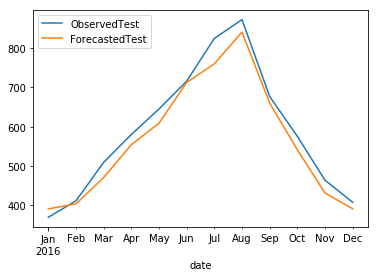

In [163]:
tc_dff = pd.DataFrame(tc_future_forecast, index = dftest.index)
pd.concat([dftest.nights_PDL,tc_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTest')
L.get_texts()[1].set_text('ForecastedTest')

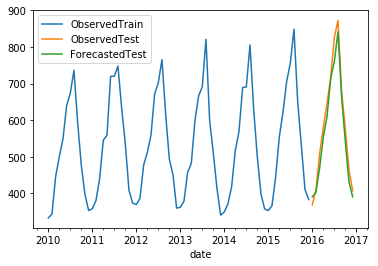

In [164]:
pd.concat([dftrain.nights_PDL,dftest.nights_PDL,tc_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTrain')
L.get_texts()[1].set_text('ObservedTest')
L.get_texts()[2].set_text('ForecastedTest')
plt.show()

In [166]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
def MASE(testing_series, prediction_series):
    n = testing_series.shape[0]
    scalingFactor = prediction_series.mean()
    errors = testing_series - prediction_series
    scaledErrors = errors/(np.sum(np.abs(testing_series - scalingFactor)) / n)
    return np.abs(scaledErrors).mean()

In [167]:
mae = mean_absolute_error(test_nights, tc_future_forecast)
print('MAE: %f' % mae)
mse = mean_squared_error(test_nights, tc_future_forecast)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mase = MASE(test_nights,tc_future_forecast)
print('MASE: %f' % mase)

MAE: 27.506505
MSE: 999.696560
RMSE: 31.617978
MASE: 0.205883
